# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.52e-06
Time:                        15:50:10   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

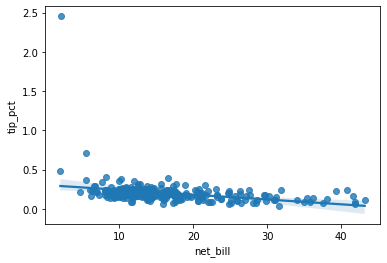

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from seaborn import load_dataset
import statsmodels.formula.api as smf

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Reproduzindo a regressão
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg.summary())

# gráfico de dispersão
sns.regplot(y='tip_pct', x='net_bill', data = tips);

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.62e-13
Time:                        15:50:10   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

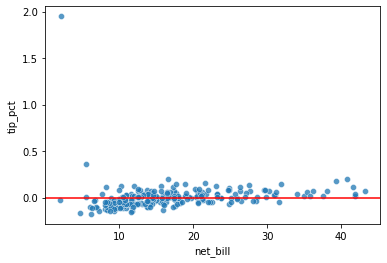

In [2]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.530
Date:                Thu, 10 Aug 2023   Prob (F-statistic):             0.0343
Time:                        15:50:10   Log-Likelihood:                 126.07
No. Observations:                 244   AIC:                            -248.1
Df Residuals:                     242   BIC:                            -241.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0414    

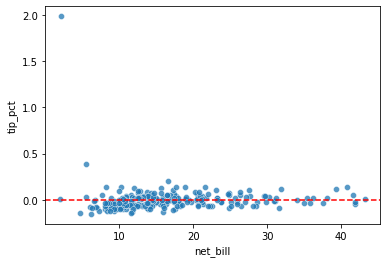

In [3]:
reg = smf.ols('tip_pct ~ np.poly1d(net_bill)', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.09832
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.754
Time:                        15:50:10   Log-Likelihood:                -172.84
No. Observations:                 105   AIC:                             349.7
Df Residuals:                     103   BIC:                             355.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5044      0.302    -11.616      0.0

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


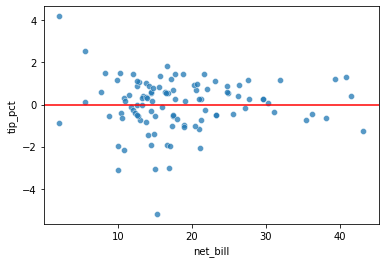

In [4]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.635
Date:                Thu, 10 Aug 2023   Prob (F-statistic):              0.110
Time:                        15:50:10   Log-Likelihood:                -68.092
No. Observations:                  58   AIC:                             140.2
Df Residuals:                      56   BIC:                             144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4823      0.584  

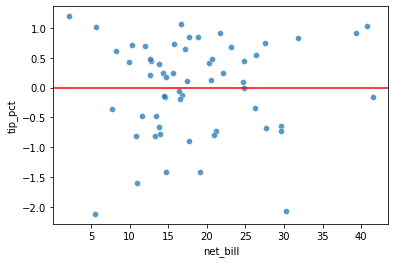

In [5]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='-')

O modelo de melhor ajuste, devido a variância ser mais uniforme, foi no modelo log de tip_pct em função de net_bill.<br>Uma variância mais uniforme aqui indica que os resíduos (diferenças entre os valores reais e os valores estimados pelo modelo) estão distribuídos de maneira mais equilibrada e que o modelo está capturando bem as tendências dos dados. Se a variância dos resíduos for muito irregular, isso pode indicar que o modelo está subestimando ou superestimando determinados padrões nos dados.

###  6. qual modelo resultou no melhor ajuste?

In [21]:
# O modelo de melhor ajuste, devido a variância ser mais uniforme, foi no modelo no log de tip_pct em função de net_bill.